<h1>Hierarchial Clustering</h1>


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import AgglomerativeClustering

<h6>Extracting the Latitude and Longitude features</h6>

In [36]:
fields = ['X','Y']
df = pd.read_csv('test.csv', usecols = fields)
numpyMatrix = df.as_matrix()
print (numpyMatrix)
print(numpyMatrix.shape)

[[-122.3995877    37.73505101]
 [-122.39152289   37.73243239]
 [-122.42600195   37.79221244]
 ..., 
 [-122.44541822   37.7120748 ]
 [-122.38739412   37.73947927]
 [-122.48971397   37.73394977]]
(884262, 2)


<h6>Random Sampling is done on the data </h6>

In [37]:
randomsample = []
for i in range(0, len(numpyMatrix)):
	a = random.uniform(0,50)
	if(a <= 1):
		randomsample.append(numpyMatrix[i])

randomsample = np.asarray(randomsample)

numpyMatrix = randomsample
print(numpyMatrix.shape)

(17654, 2)


<h6>Scaling Features </h6>

In [38]:
for i in range(len(numpyMatrix)):
	x = numpyMatrix[i][0]
	x *= (-1)
	x %= 122
	x *= 100
	numpyMatrix[i][0] = x

	y = numpyMatrix[i][1]
	y %= 37
	y *= 100
	numpyMatrix[i][1] = y
print (numpyMatrix)

[[ 46.47225688  76.41617178]
 [ 40.63243139  75.36322499]
 [ 43.48598399  72.90305173]
 ..., 
 [ 41.749943    75.30846714]
 [ 42.18987364  74.71459432]
 [ 41.07216259  78.70966496]]


<h6>Setting limits of the graph</h6>

In [39]:
plt.xlim(37.5, 52.5)
plt.ylim(70, 82.5)

(70, 82.5)

<h6>Setting Labels</h6>

In [40]:
plt.xlabel('Latitude')
plt.ylabel('Longitude')

<h6>Fitting the model</h6>

In [41]:
model = AgglomerativeClustering(n_clusters=10)
model.fit(numpyMatrix)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f8c7c2286a8>)

<h6>Plotting data and visualizing Clusters</h6>

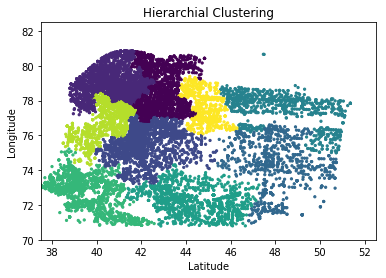

In [42]:
colors = [i for i in model.labels_]
plt.scatter(numpyMatrix[:,0], numpyMatrix[:,1], s = 5, c = colors)
plt.title('Hierarchial Clustering')
plt.figure(1)
plt.show()